In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [9]:
url = 'https://raw.githubusercontent.com/alpsina/pi_intern_questions/main/dataset.csv'
data = pd.read_csv(url)


# Displaying basic information about the dataset

In [10]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB
None
         feature_1    feature_2    feature_3    feature_4
count  1897.000000  1899.000000  1893.000000  1897.000000
mean      0.814404     1.795843     2.621096     0.807499
std       1.729538     1.605611     1.474973     1.768597
min      -2.285499    -7.363119    -5.363119    -3.006499
25%      -0.556433     0.975148     1.671905    -0.563357
50%       0.084789     1.881904     2.499623     0.021857
75%       2.270955     2.840511     3.470200     2.319822
max       5.929096     7.549658     9.549658     5.759355


# Visualize the distribution of each feature

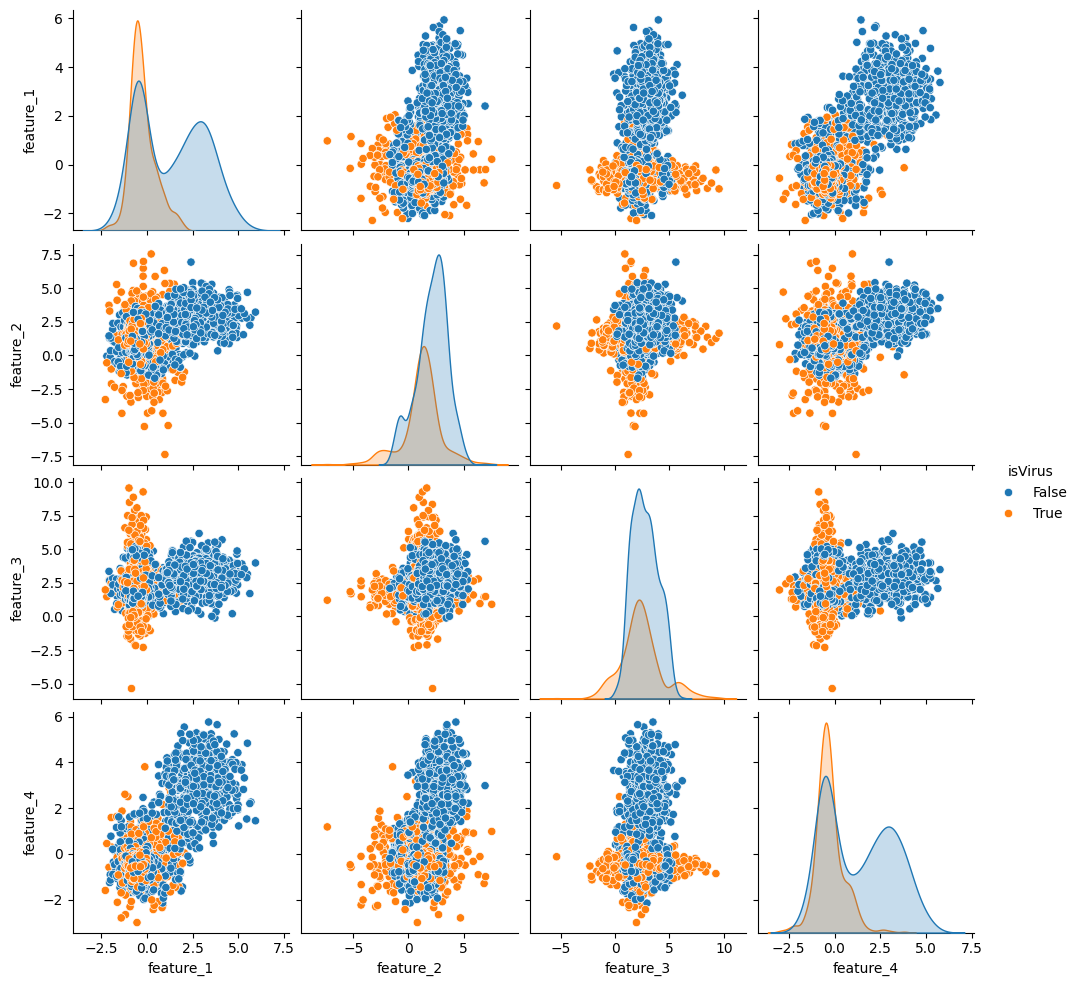

In [11]:
sns.pairplot(data, hue='isVirus')
plt.show()

# Visualize the count of each class

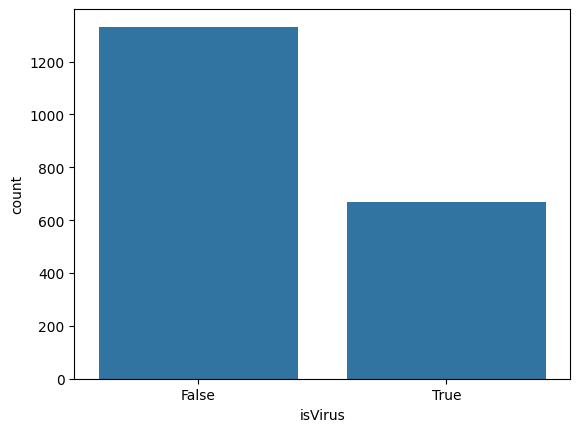

In [12]:
sns.countplot(x='isVirus', data=data)
plt.show()

In [2]:
pip install seaborn



   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 119.1 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 119.1 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 119.1 kB/s eta 0:00:03
   ----- ---------------------------------- 41.0/294.9 kB 93.7 kB/s eta 0:00:03
   ----- --------------------------

#  2. CLEAN DATA 

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Impute missing values

In [14]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.iloc[:, :-1]), columns=data.columns[:-1])
data_imputed['isVirus'] = data['isVirus']

# Balance the dataset

In [15]:
virus = data_imputed[data_imputed.isVirus == True]
not_virus = data_imputed[data_imputed.isVirus == False]

virus_upsampled = resample(virus, replace=True, n_samples=len(not_virus), random_state=42)
data_balanced = pd.concat([not_virus, virus_upsampled])

# Visualize the cleaned data

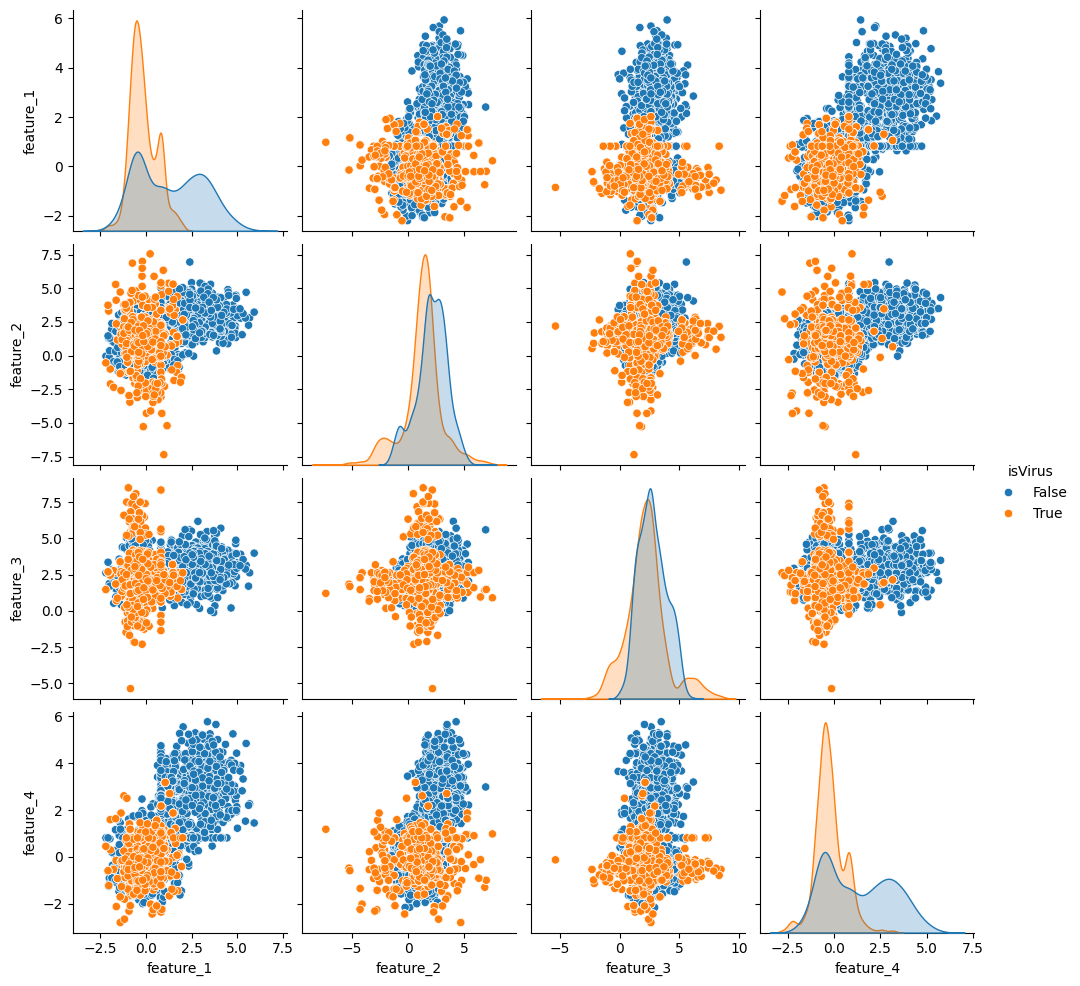

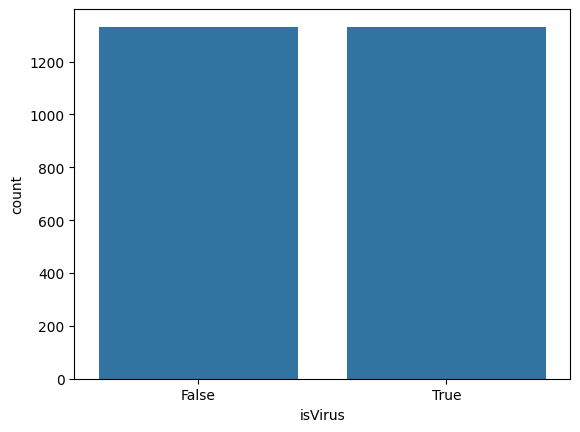

In [16]:
sns.pairplot(data_balanced, hue='isVirus')
plt.show()

sns.countplot(x='isVirus', data=data_balanced)
plt.show()

# 3. Create a Simple Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Split the data into training and testing sets

In [18]:
X = data_balanced.iloc[:, :-1]
y = data_balanced['isVirus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Predict on the test set

In [20]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


# Evaluate the model

In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[155 114]
 [ 40 224]]
              precision    recall  f1-score   support

       False       0.79      0.58      0.67       269
        True       0.66      0.85      0.74       264

    accuracy                           0.71       533
   macro avg       0.73      0.71      0.71       533
weighted avg       0.73      0.71      0.71       533



# Visualize the confusion matrix

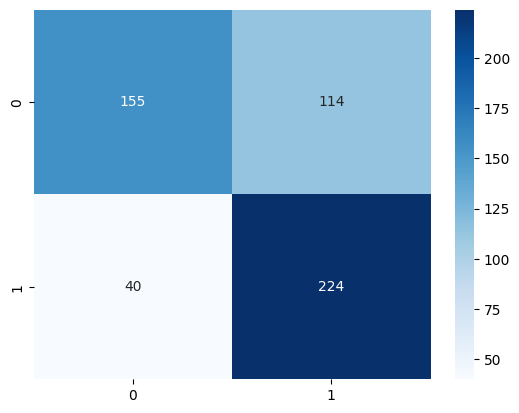

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


# Plot ROC curve

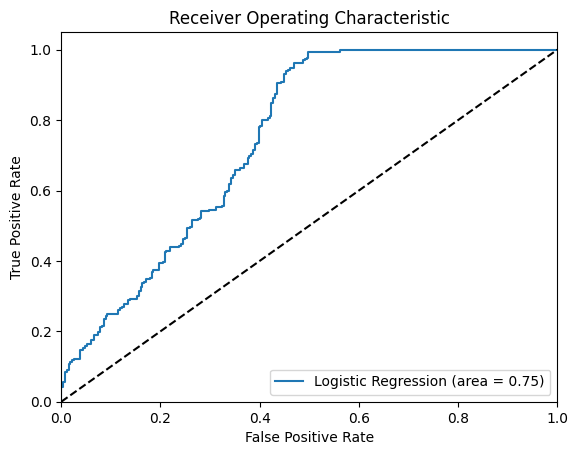

In [24]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [1]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.
